# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Data Science/FDS_Project_FoodHub_Data_Analysis/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
#Number of rows and columns
num_rows, num_columns = df.shape
#Print results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1898
Number of columns: 9


#### Observations:
There are 1898 numbers of orders and data points

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 9 data set

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
#Check summary of missing values
missing_values = df.isnull().sum()
#Print result
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
no missing values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
#assign summary
food_summary = df['food_preparation_time'].describe()

# Extract values
minimum_time = food_summary['min']
average_time = round(food_summary['mean'],2)
maximum_time = food_summary['max']

# Print the results
print(f"Minimum preparation time: {minimum_time} minutes")
print(f"Average preparation time: {average_time} minutes")
print(f"Maximum preparation time: {maximum_time} minutes")

Minimum preparation time: 20.0 minutes
Average preparation time: 27.37 minutes
Maximum preparation time: 35.0 minutes


#### Observations:
Average food preparation time is 27.37 minutes

### **Question 5:** How many orders are not rated?

Number of orders not rated: 736


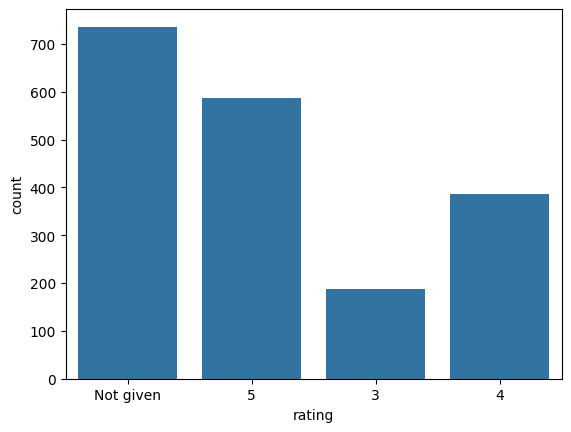

In [ ]:
# Write the code here
#check in graph
sns.countplot(x="rating", data=df)
#Exact value
not_rated_count = df['rating'].value_counts(dropna=False).get("Not given", 0)

# Print the result
print("Number of orders not rated:", not_rated_count)

#### Observations:
Clients do not normally rates their orders

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

Customer ID

In [ ]:
# Write the code here
#Number of unique customers
unique_customers = df['customer_id'].nunique()
print(f'Number of unique Customer IDs: {unique_customers}')

Number of unique Customer IDs: 1200


Restaurant name

In [ ]:
#Number of unique restaurant names
unique_restaurants = df['restaurant_name'].nunique()
print(f'Number of unique Restaurant names: {unique_restaurants}')

Number of unique Restaurant names: 178


Cuisine type

In [ ]:
#Number of unique cuisines
unique_cuisines = df['cuisine_type'].nunique()
print(f'Number of unique Cuisine types: {unique_cuisines}')

Number of unique Cuisine types: 14


<Axes: xlabel='cuisine_type', ylabel='count'>

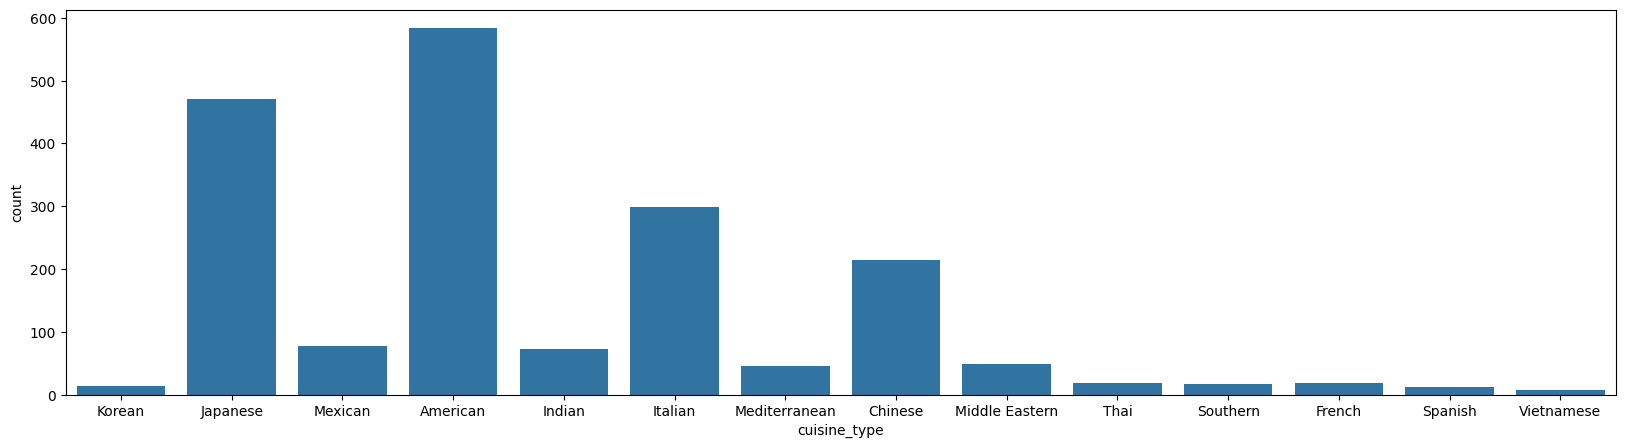

In [ ]:
#Countplot for cuisine type
plt.figure(figsize = (20,5))
sns.countplot(data = df, x = 'cuisine_type')

Cost of the order

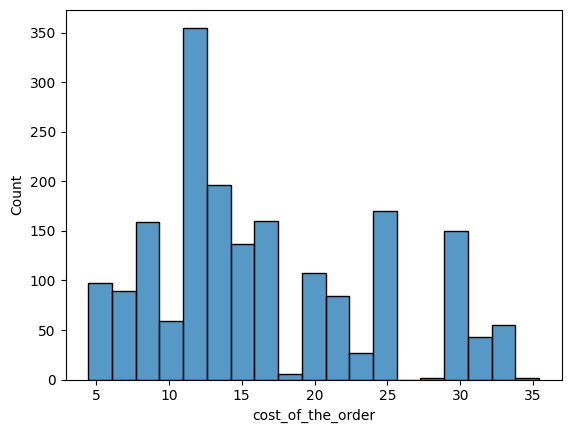

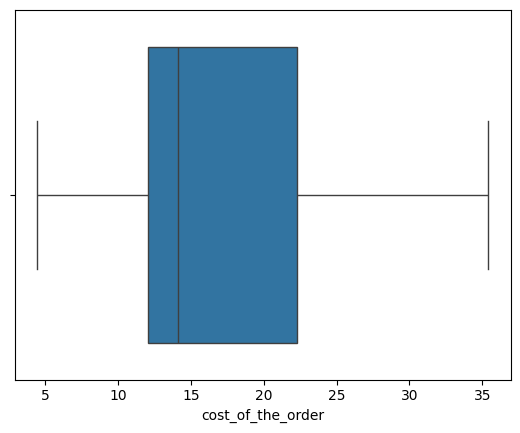

In [ ]:
#Histogram of cost of order
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
#Boxplot of cost of order
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

Day of the week

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


<Axes: xlabel='day_of_the_week', ylabel='count'>

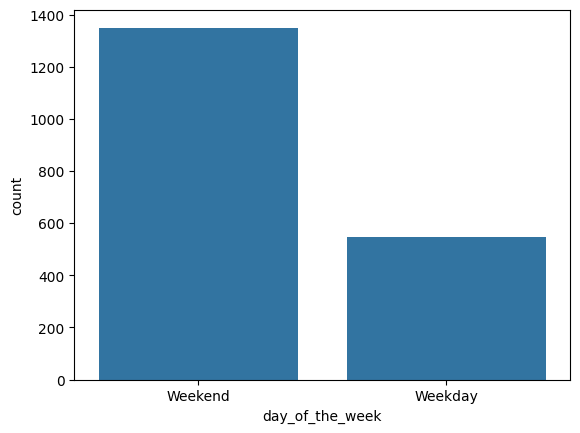

In [ ]:
#Unique values day of the week and how much each
day_count = df['day_of_the_week'].value_counts()
print(day_count)
sns.countplot(data = df, x = 'day_of_the_week')

In [ ]:
percentage_distribution = df['day_of_the_week'].value_counts(normalize=True) * 100
# Print the percentage distribution
print(round(percentage_distribution,2))


Weekend    71.18
Weekday    28.82
Name: day_of_the_week, dtype: float64


Rating

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


<Axes: xlabel='rating', ylabel='count'>

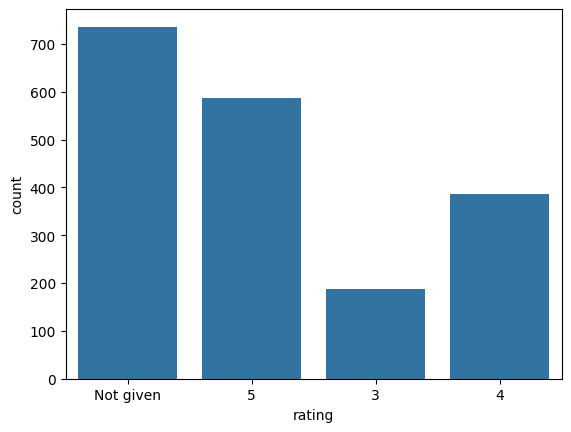

In [ ]:
#Unique values of rating
unique_rating = df['rating'].value_counts()
print(unique_rating)
sns.countplot(data = df, x = 'rating')


Food preparation time

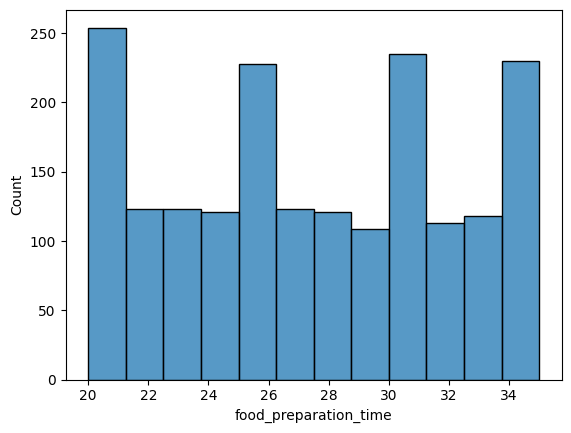

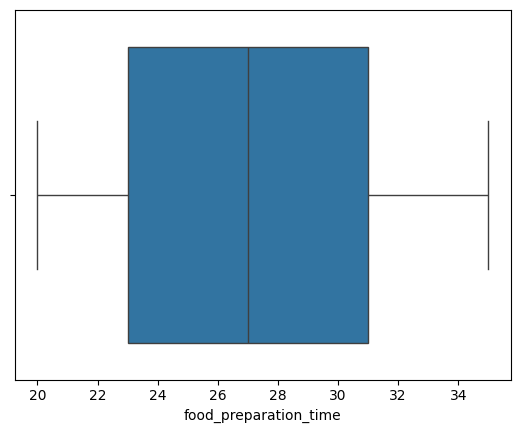

In [ ]:
#Histogram of Food preparation time
sns.histplot(data=df,x='food_preparation_time')
plt.show()
#Boxplot of Food preparation time
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

Delivery Time

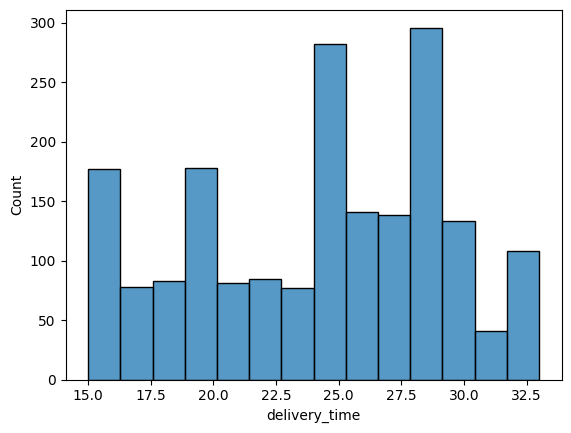

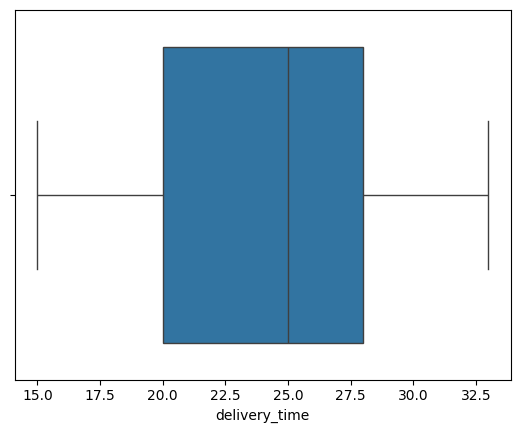

In [ ]:
#Histogram of Delivery Time
sns.histplot(data=df,x='delivery_time')
plt.show()
#Boxplot of Delivery Time
sns.boxplot(data=df,x='delivery_time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
#Top 5 restaurant
df['restaurant_name'].value_counts().head(5)


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
One third orders comes from the top 5 restaurants



### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
# Look for order on weekend only
df_weekend = df [df['day_of_the_week'] == 'Weekend']
# Look for the top 1 cuisine
popular_weekend = df_weekend['cuisine_type'].value_counts().head(1)
print(f'Most popular cuisine on weekends: {popular_weekend}')

Most popular cuisine on weekends: American    415
Name: cuisine_type, dtype: int64


#### Observations:
About one third of the orders during weekend is American

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
# Look for orders above 20
greater_20 = df[df['cost_of_the_order']>20]
# Total number of order above 20
print(f'Total numbers of orders above 20 dollars: {greater_20.shape[0]}')
# Percentage of orders above 20 usd
percentage_20 = (greater_20.shape[0]/df.shape[0]) * 100
print(f'The percentage of orders above 20 dollars: {round(percentage_20,2)}', "%")

Total numbers of orders above 20 dollars: 555
The percentage of orders above 20 dollars: 29.24 %


#### Observations:
Majority of the orders are 20 dollars and below

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
#Calculate the mean
#assign summary
delivery_time__summary = df['delivery_time'].describe()

# Extract values
mean_delivery_time = delivery_time__summary['mean']

# Print the results
print(f"Mean order delivery time: {round(mean_delivery_time,2)} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:
Average delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
#Top 3 customer
df['customer_id'].value_counts().head(3)



52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

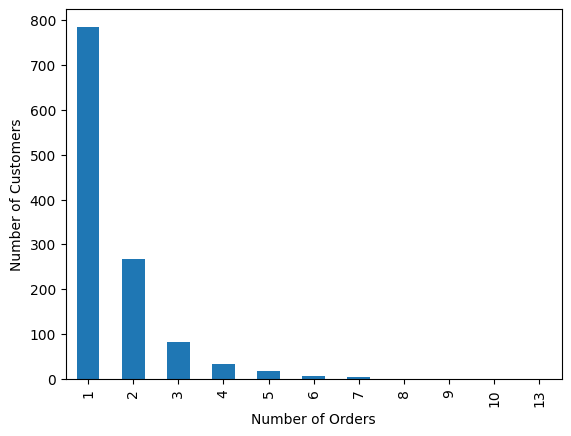

In [ ]:
# Count the frequency of orders for each customer
customer_order_counts = df['customer_id'].value_counts()

# Count the frequency of each order count
order_count_distribution = customer_order_counts.value_counts().sort_index()

# Plot the distribution
order_count_distribution.plot(kind='bar', xlabel='Number of Orders', ylabel='Number of Customers')
plt.show()


#### Observations:
There are not many repeating customers

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

Cuisine and Cost of order

<ipython-input-25-90844eda6a17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'plasma')


<Axes: xlabel='cuisine_type', ylabel='cost_of_the_order'>

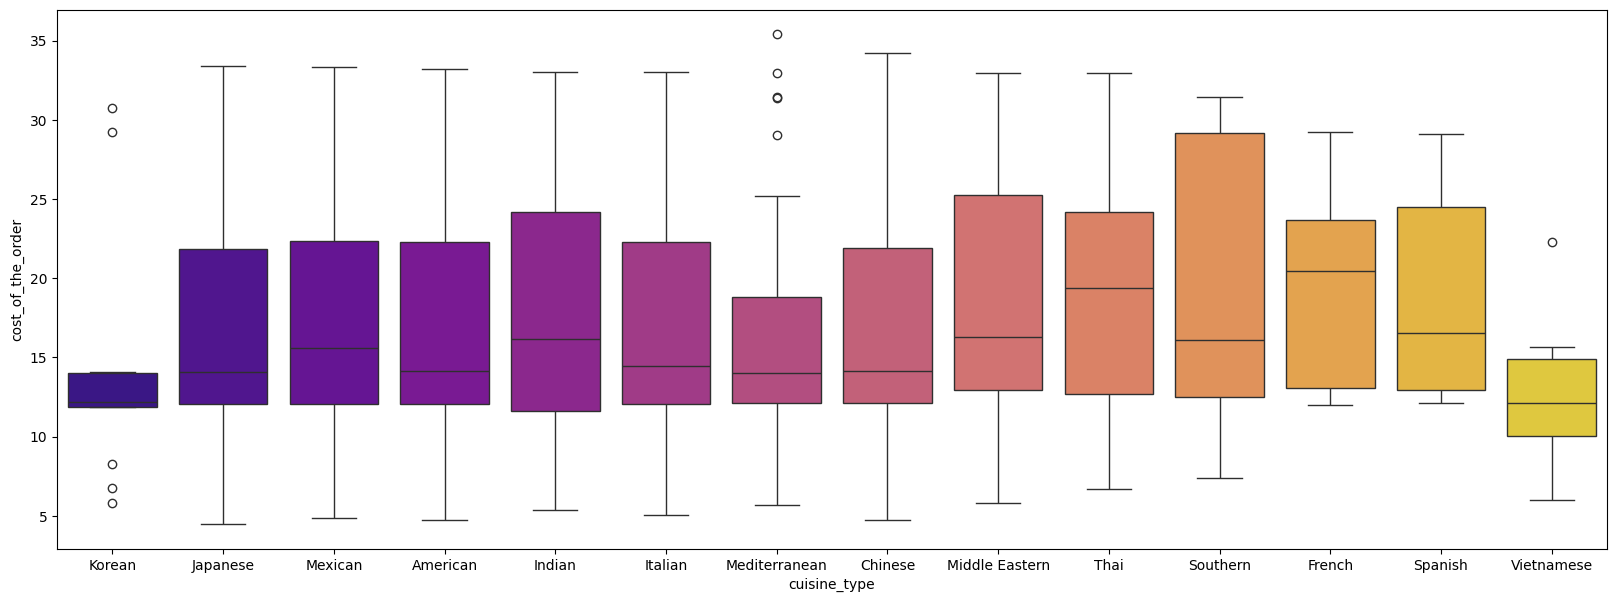

In [ ]:
# Write the code here
#Boxplot of Cuisine type vs cost of order
plt.figure(figsize=(20,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'plasma')

Cuisine and Food preparation time

<ipython-input-26-021b42649ab4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'viridis')


<Axes: xlabel='cuisine_type', ylabel='food_preparation_time'>

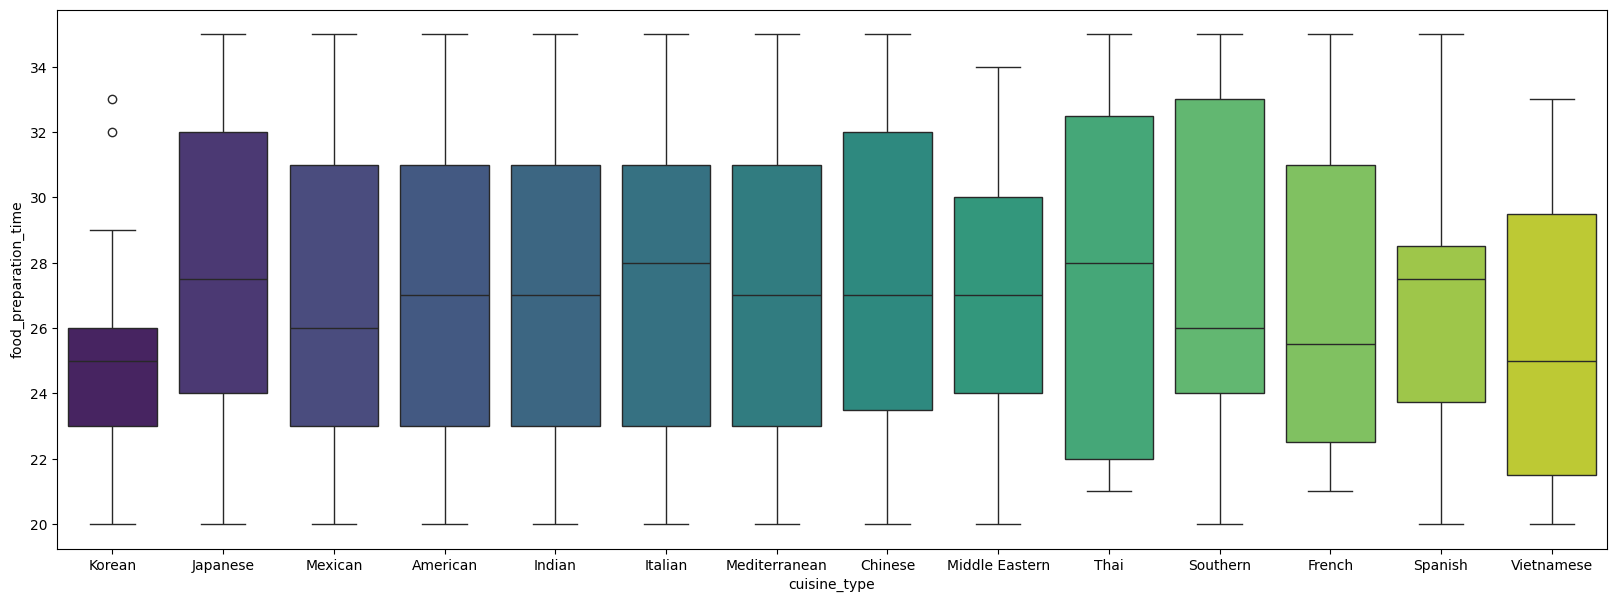

In [ ]:
#Boxplot of cuisine type vs food preparation time
plt.figure(figsize=(20,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'viridis')


Day of the week and Delivery time

<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

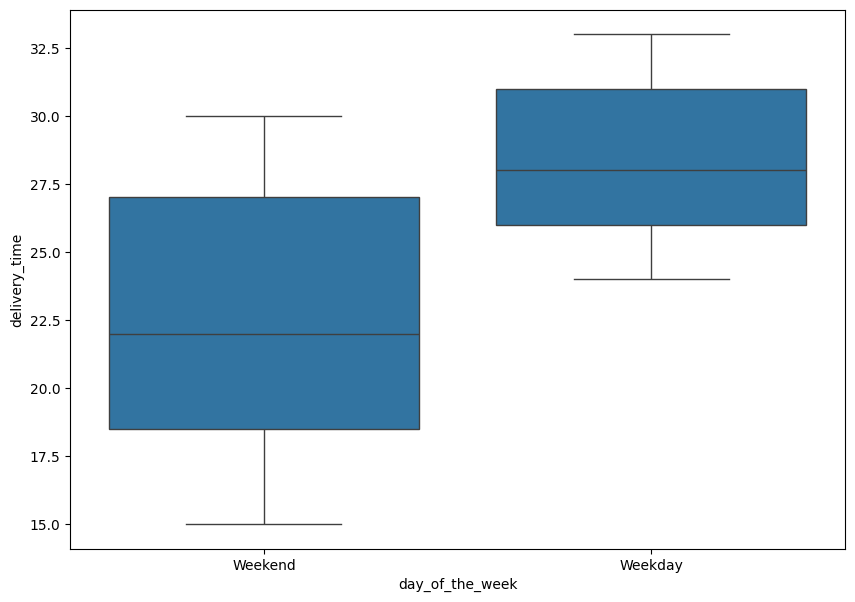

In [ ]:
#Boxplot of Delivery Time vs day of the week
plt.figure(figsize=(10,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)


Restaurant revenue

In [ ]:
# Revenue of restaurants
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(20)

restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Name

Rating and Delivery time

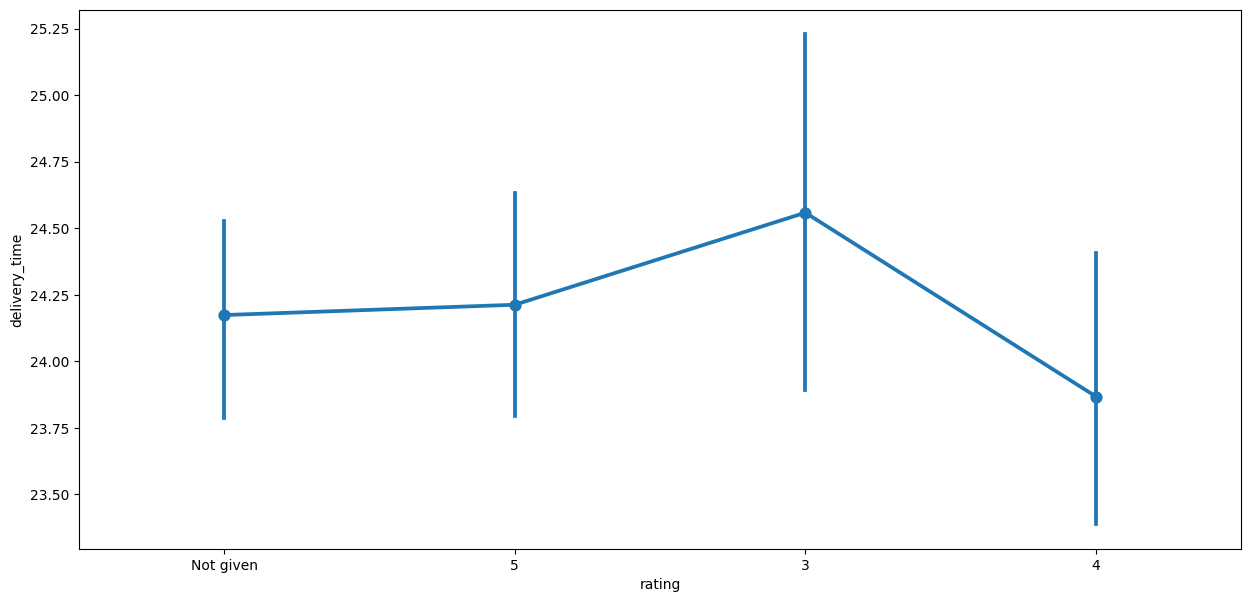

In [ ]:
# Pointplot of Delivery Time vs rating
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

Rating and Food preparation time

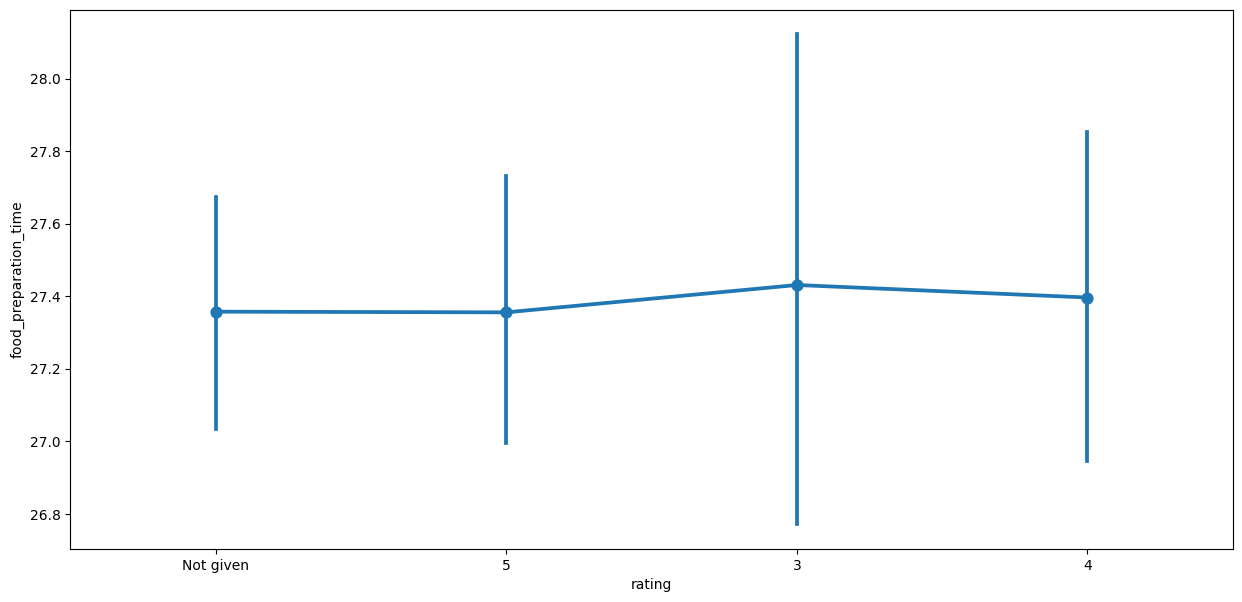

In [ ]:
# Pointplot of food preparation time vs rating
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

Rating and Cost of order

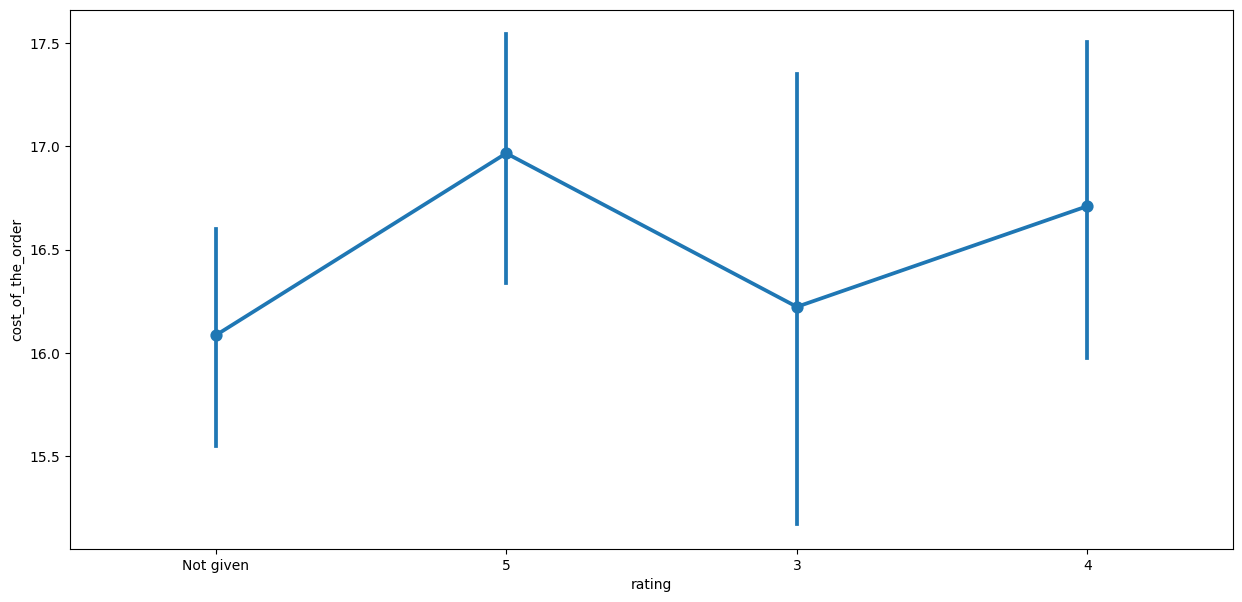

In [ ]:
# Pointplot of rating vs cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

# Correlation among variables

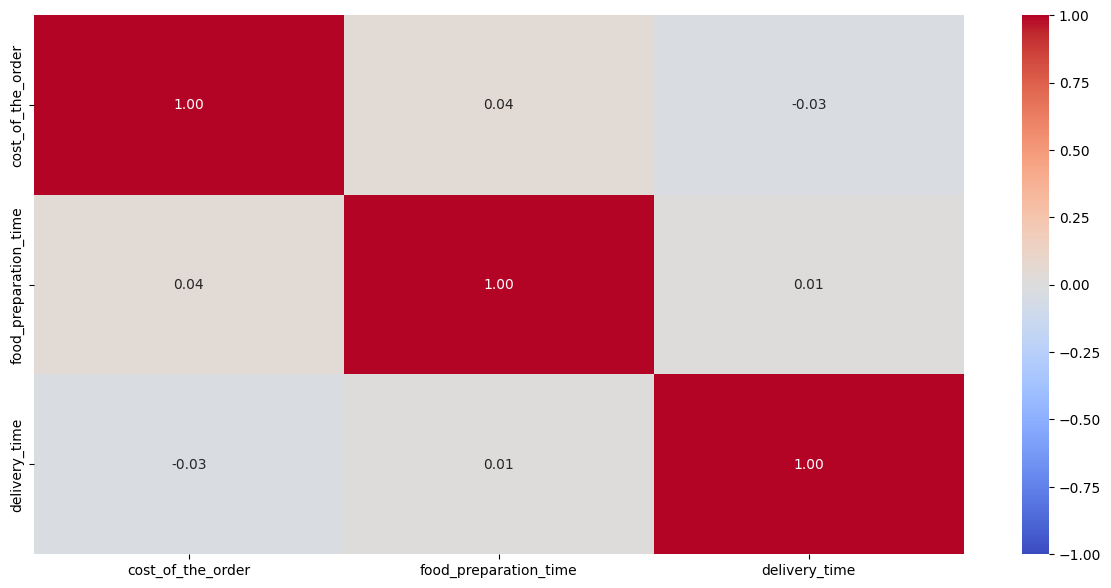

In [ ]:
# Correlation of cost of the order, food preparation time and delivery time
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here
# Group by rating count
df_rated = df[df['rating'] != 'Not given'].copy()
df_rated['rating'] = df_rated['rating'].astype('int')
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head(5)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Group by rating
df_rating_average=df_rated.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False)
df_rating_average.head()

restaurant_name
'wichcraft                       5.0
Ravagh Persian Grill             5.0
Chola Eclectic Indian Cuisine    5.0
Chote Nawab                      5.0
Junoon                           5.0
Name: rating, dtype: float64

In [ ]:
# Filter restaurants with a rating count greater than 50
df_filtered = df_rating_count[df_rating_count['rating'] > 50]

# Merge with the average ratings DataFrame
df_filtered = pd.merge(df_filtered, df_rating_average, on='restaurant_name')

# Filter restaurants with an average rating greater than 4
df_filtered = df_filtered[df_filtered['rating_y'] > 4]

# Display the final result
df_filtered[['restaurant_name', 'rating_x', 'rating_y']].rename(columns={'rating_x': 'rating_count', 'rating_y': 'rating_average'})

,restaurant_name,rating_count,rating_average
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here
# Define rules on computing revenue
def compute_revenue(x):
  if x > 20:
    return x*.25
  elif x > 5:
    return x*.15
  else:
    return x*0

df['revenue'] = df['cost_of_the_order'].apply(compute_revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# Sum of total revenue
total_revenue = df['revenue'].sum()
print(f'The total revenue: ${total_revenue}' )

The total revenue: $6166.303


#### Observations:
Orders costing more than 20 dollars gives more revenue to the company

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here
# Total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Look for orders above 60 minutes
greater_60 = df[df['total_time']>60]
# Total number of order above 60 minutes
print(f'Total numbers of orders that takes more than 60 minutes to deliver: {greater_60.shape[0]}')
# Percentage of orders above 60 minutes
percentage_60 = (greater_60.shape[0]/df.shape[0]) * 100
print(f'The percentage of orders that takes more than 60 minutes to deliver {round(percentage_60,2)}', "%")


Total numbers of orders that takes more than 60 minutes to deliver: 200
The percentage of orders that takes more than 60 minutes to deliver 10.54 %


#### Observations:
Majority of the preparation and delivery time takes less than 60 minutes

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekdend is around 22 minutes


<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

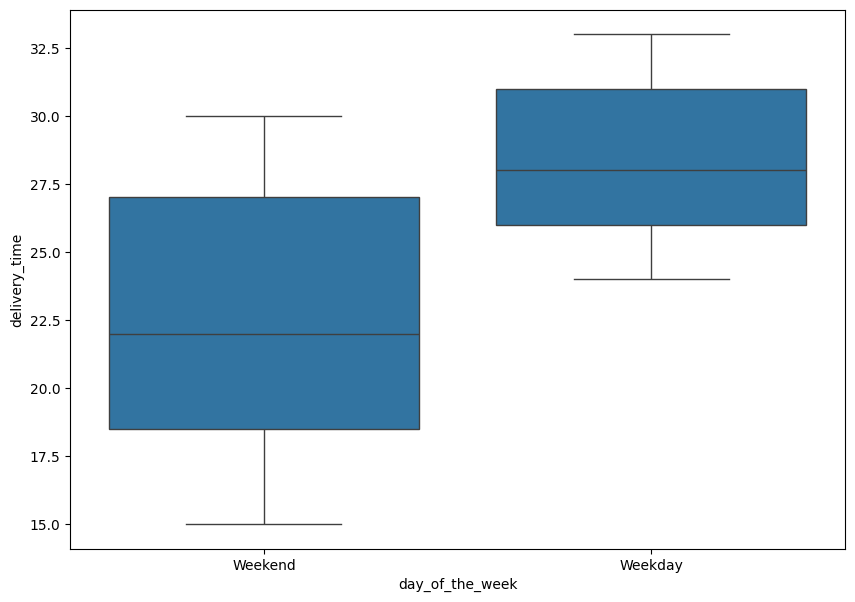

In [ ]:
# Write the code here
# Print average delivery time on weekdays and weekend
print('The mean delivery time on weekdays is around', round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),'minutes')
print('The mean delivery time on weekdend is around', round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),'minutes')
# Boxplot of delivery time
plt.figure(figsize=(10,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)

#### Observations:
Delivery time is longer during the weekday

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  There are 1200 number of unique customer, more than half only order once.
* Popular cuisines are American, Japanese, Italian and Chinese. American being the most popular.
* Orders below 20 dollars consist 70.76% of the orders.
* Customers don’t rate their orders.
* Most of the orders comes during the weekend 71.18%.

### Recommendations:

*  Incentives and rewards for repeating customers to encourage resell (Like after N number of order you get certain percentage of discount)
* Discount or vouchers during the weekdays to drive sales
* Rewards to customers who rates their orders and add the highest rating cuisine and restaurant to must try that changes on a weekly basis
* Special limited prices for orders 60 dollars and above giving a chance for new customers to try new cuisine

---